In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [3]:
portfolio = pd.read_excel('/Users/jatindhurve/Desktop/Regime_Portfolio_project/Data/portfolio_data.xlsx')
regimes = pd.read_excel('/Users/jatindhurve/Desktop/Regime_Portfolio_project/Regime_indentification/hmm_regime_identification.xlsx')

In [4]:
portfolio.rename(columns={
    'sp_500': 'EQU',
    'treasury_bonds': 'GOVT',
    'corporate_bonds': 'CORP',
    'commodity_index': 'COMM',
    'REIT': 'REITs'
}, inplace=True)

In [5]:
df1 = portfolio
df1.head(1)

,Date,EQU,GOVT,CORP,COMM,REITs
0,1990-01-31,329.08,460.81,448.15,92.5128,194.66


In [6]:
df1.tail(1)

,Date,EQU,GOVT,CORP,COMM,REITs
422,2025-03-31,5611.85,2357.12,3365.38,106.4009,779.47


In [7]:
df2 = regimes
df2.head(1)

,Date,VIX,PMI,yield_curve,regimes
0,1990-01-31,25.36,47.2,16.35,Slowdown


In [8]:
df2 = regimes
df2.tail(1)

,Date,VIX,PMI,yield_curve,regimes
422,2025-03-31,22.28,49.0,31.799,Slowdown


In [9]:
df2.columns

Index(['Date', 'VIX', 'PMI', 'yield_curve', 'regimes'], dtype='object')

In [10]:
if 'Date' in portfolio.columns:
    portfolio_data = portfolio.set_index('Date')
else:
    portfolio_data = portfolio.copy()

In [11]:
df1 = df1.set_index('Date')
df1 = df1.pct_change().dropna()
df1.describe()

,EQU,GOVT,CORP,COMM,REITs
count,422.000000,422.000000,422.000000,422.000000,422.000000
mean,0.007661,0.003964,0.004933,0.001233,0.004766
std,0.042643,0.013330,0.016942,0.042215,0.053474
min,-0.169425,-0.043923,-0.077692,-0.213401,-0.319098
25%,-0.017670,-0.003422,-0.003518,-0.020974,-0.024232
50%,0.011718,0.003985,0.005932,0.001936,0.007512
75%,0.034661,0.012183,0.014268,0.025788,0.037033
max,0.126844,0.053071,0.067965,0.131516,0.305041


(<Axes: title={'center': 'Portfolio Returns'}, xlabel='Date'>,
 Text(0.5, 1.0, 'Portfolio Returns'))

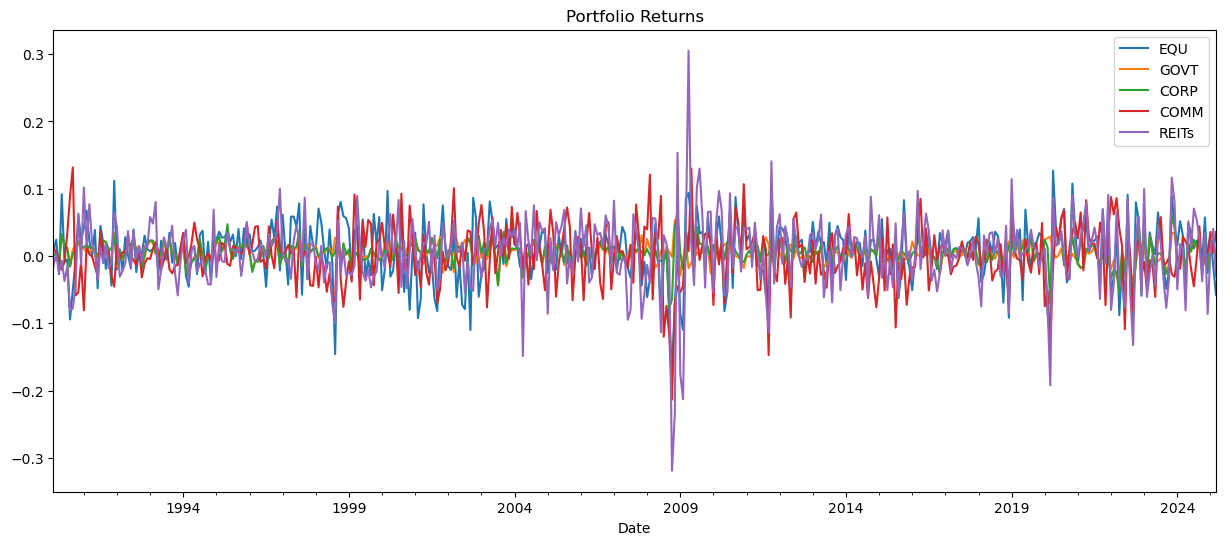

In [12]:
df1.plot(figsize=(15, 6)), plt.title('Portfolio Returns') 

(<Axes: title={'center': 'Cumulative Portfolio Returns'}, xlabel='Date'>,
 Text(0.5, 1.0, 'Cumulative Portfolio Returns'))

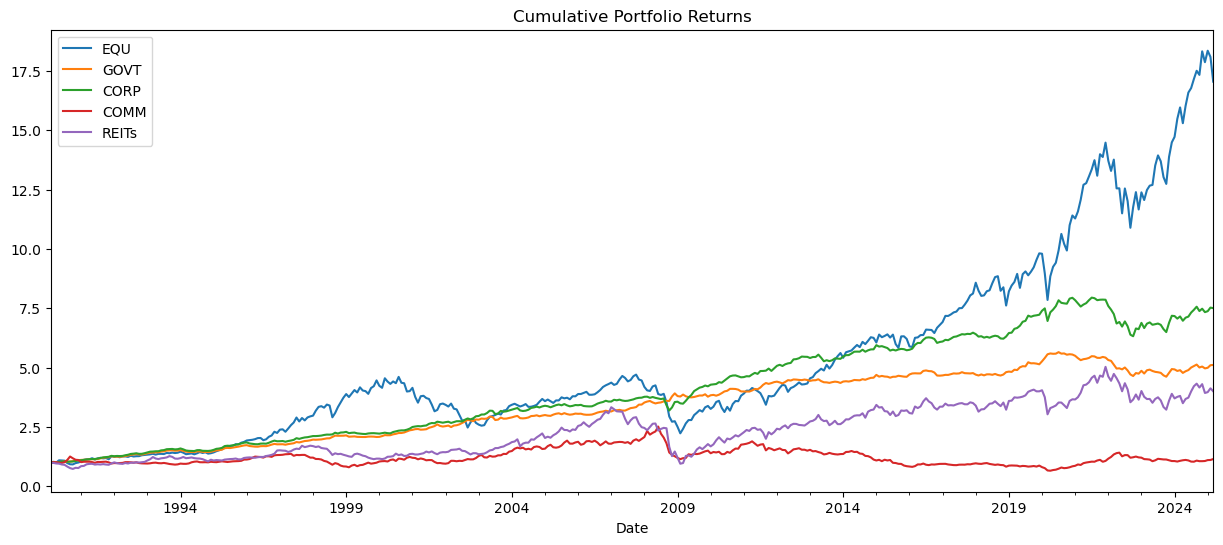

In [13]:
df1_cum = (1 + df1).cumprod()
df1_cum.plot(figsize=(15, 6)), plt.title('Cumulative Portfolio Returns')

In [14]:
asset_perf = pd.DataFrame(dtype = float, columns = ['return','vol','sharpe','max drawdown'])
asset_perf['return'] = df1_cum.iloc[-1] ** (1/(df1_cum.shape[0]/12)) - 1
asset_perf['vol'] = df1_cum.std() * np.sqrt(12)
asset_perf['sharpe'] = asset_perf['return']/asset_perf['vol']
asset_perf['max drawdown'] = (1 - df1_cum/df1_cum.cummax()).max()
asset_perf

,return,vol,sharpe,max drawdown
EQU,0.083996,13.699514,0.006131,0.525559
GOVT,0.047508,4.823254,0.009850,0.182950
CORP,0.059007,7.304786,0.008078,0.204614
COMM,0.003985,1.142285,0.003489,0.738673
REITs,0.040240,3.721083,0.010814,0.714022


In [18]:
df1.head()

,EQU,GOVT,CORP,COMM,REITs
Date,,,,,
1990-02-28,0.008539,0.001758,0.002901,0.014607,-0.014230
1990-03-30,0.024255,-0.000325,0.000912,0.003078,0.002189
1990-04-30,-0.026887,-0.009188,-0.010425,-0.001927,-0.024492
1990-05-31,0.091989,0.028126,0.032347,-0.020399,-0.006823
1990-06-29,-0.008886,0.015848,0.017081,-0.008679,-0.037194


In [17]:
df2.head()

,VIX,PMI,yield_curve,regimes
Date,,,,
1990-01-31,25.36,47.2,16.35,Slowdown
1990-02-28,21.99,49.1,9.35,Slowdown
1990-03-30,19.73,49.9,0.55,Slowdown
1990-04-30,19.52,50.0,7.75,Slowdown
1990-05-31,17.37,49.5,11.65,Slowdown


In [19]:
# df2 = df2.set_index('Date')  # Add this before concatenation
df = pd.concat([df1, df2['regimes']], axis=1)
df = df.dropna()
df

,EQU,GOVT,CORP,COMM,REITs,regimes
Date,,,,,,
1990-02-28,0.008539,0.001758,0.002901,0.014607,-0.014230,Slowdown
1990-03-30,0.024255,-0.000325,0.000912,0.003078,0.002189,Slowdown
1990-04-30,-0.026887,-0.009188,-0.010425,-0.001927,-0.024492,Slowdown
1990-05-31,0.091989,0.028126,0.032347,-0.020399,-0.006823,Slowdown
1990-06-29,-0.008886,0.015848,0.017081,-0.008679,-0.037194,Slowdown
...,...,...,...,...,...,...
2024-11-29,0.057301,0.007772,0.013377,0.000469,0.034124,Slowdown
2024-12-31,-0.024990,-0.015408,-0.019354,0.006312,-0.086253,Slowdown
2025-01-31,0.027016,0.005174,0.005527,0.035755,0.008943,Slowdown


In [20]:
print("Unique regimes:", df['regimes'].unique())

Unique regimes: ['Slowdown' 'Downturn' 'Recovery' 'Expansion']


In [21]:
print("\nRegime counts:\n", df['regimes'].value_counts())


Regime counts:
 regimes
Recovery     145
Expansion    135
Downturn      96
Slowdown      46
Name: count, dtype: int64


In [22]:
regime_summary = pd.DataFrame({
    'Observations': df['regimes'].value_counts(),
    'Percentage': df['regimes'].value_counts(normalize=True) * 100,
    'Years': df['regimes'].value_counts() / 12
}).round(2)
print("Table 6.1: Regime Distribution and Sample Characteristics")
print(regime_summary)

Table 6.1: Regime Distribution and Sample Characteristics
           Observations  Percentage  Years
regimes                                   
Recovery            145       34.36  12.08
Expansion           135       31.99  11.25
Downturn             96       22.75   8.00
Slowdown             46       10.90   3.83


In [23]:
def performance_measure(asset_returns):
    asset_returns.plot(figsize = (15, 6), title = 'Monthly Return')
    asset_perf = pd.DataFrame(dtype = float, columns = ['annualized average return','vol','sharpe'])
    asset_perf['annualized average return'] = np.mean(asset_returns, axis=0) * 12
    asset_perf['vol'] = asset_returns.std() * np.sqrt(12)
    asset_perf['sharpe'] = asset_perf['annualized average return']/asset_perf['vol']
    return asset_perf

### **Recovery Regime**

In [25]:
df_Recovery = df[df['regimes'] == 'Recovery']
df_Recovery = df_Recovery.drop('regimes', axis=1)
df_Recovery.head(1)

,EQU,GOVT,CORP,COMM,REITs
Date,,,,,
1991-05-31,0.038577,0.00372,0.006879,-0.015595,0.005812


,annualized average return,vol,sharpe
EQU,0.133440,0.093817,1.422344
GOVT,0.044939,0.040244,1.116670
CORP,0.066052,0.046141,1.431527
COMM,0.000760,0.112850,0.006731
REITs,0.103901,0.124999,0.831212


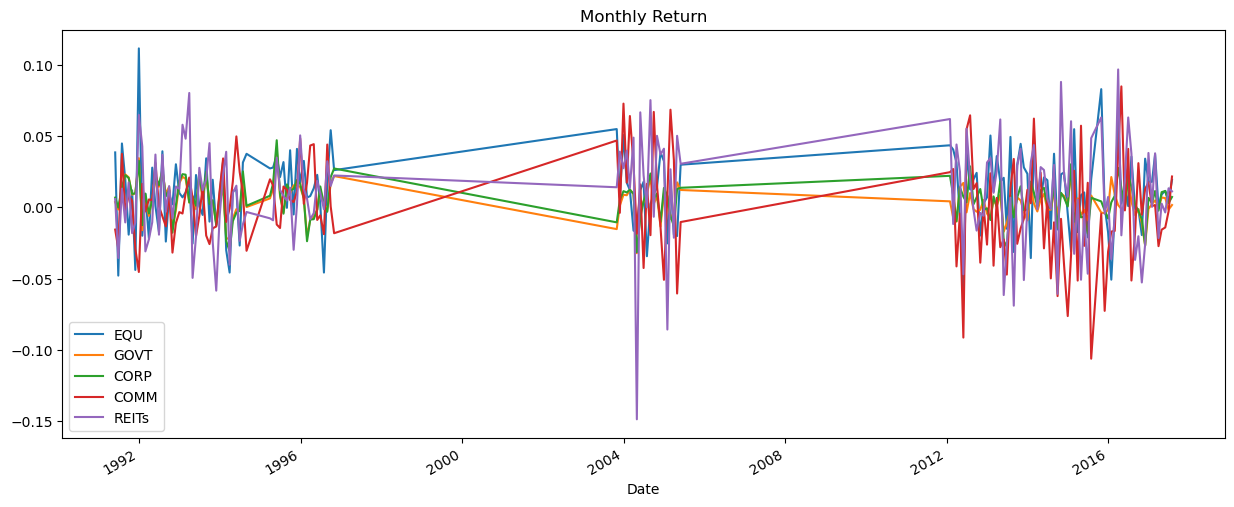

In [26]:
performance_measure(df_Recovery)

### **Expansion Regime**

In [27]:
df_Expansion = df[df['regimes'] == 'Expansion']
df_Expansion = df_Expansion.drop('regimes', axis=1)
df_Expansion.head(1)

,EQU,GOVT,CORP,COMM,REITs
Date,,,,,
1994-09-30,-0.02692,-0.014048,-0.018638,-0.002338,-0.021898


,annualized average return,vol,sharpe
EQU,0.146761,0.143594,1.022060
GOVT,0.014505,0.044574,0.325409
CORP,0.023202,0.060399,0.384138
COMM,0.067508,0.130719,0.516439
REITs,0.061840,0.163644,0.377897


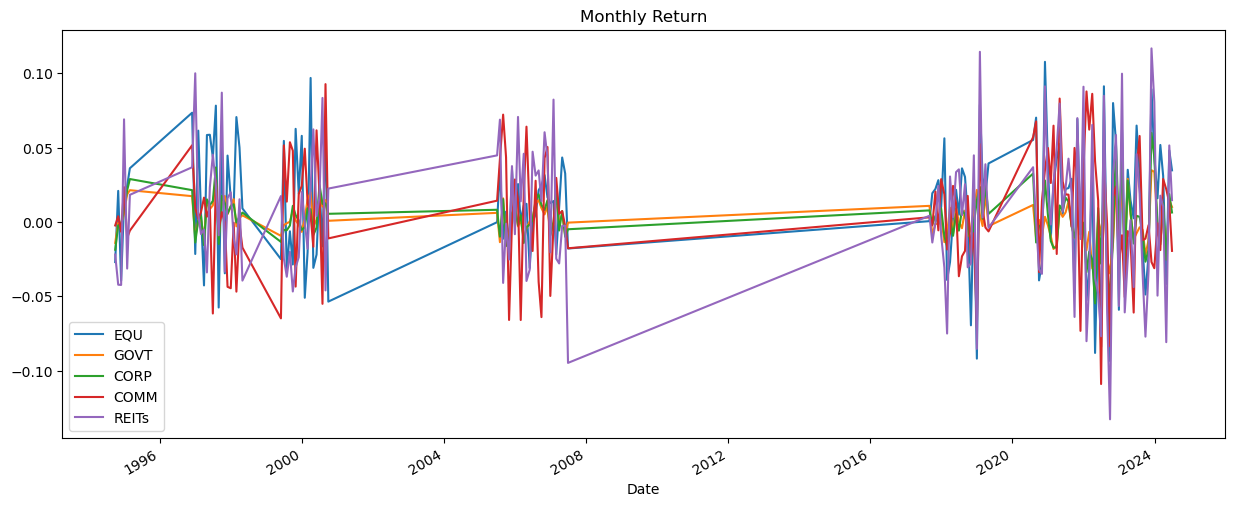

In [28]:
performance_measure(df_Expansion)

### **Downturn Regimes**

In [29]:
df_Downturn = df[df['regimes'] == 'Downturn']
df_Downturn = df_Downturn.drop('regimes', axis=1)
df_Downturn.head(1)

,EQU,GOVT,CORP,COMM,REITs
Date,,,,,
1990-08-31,-0.094314,-0.014392,-0.015929,0.089244,-0.080524


,annualized average return,vol,sharpe
EQU,-0.026225,0.196654,-0.133357
GOVT,0.073121,0.053394,1.369478
CORP,0.091597,0.069836,1.311596
COMM,-0.006595,0.197822,-0.033336
REITs,0.044980,0.274351,0.163950


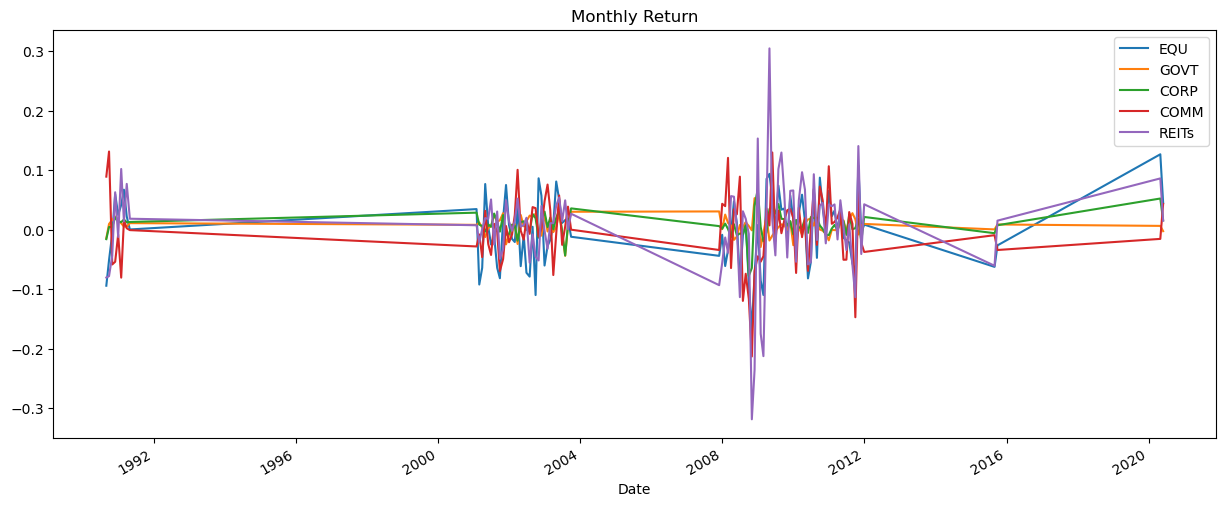

In [30]:
performance_measure(df_Downturn)

### **Slowdown Regime**

In [31]:
df_Slowdown = df[df['regimes'] == 'Slowdown']
df_Slowdown = df_Slowdown.drop('regimes', axis=1)
df_Slowdown.head(1)

,EQU,GOVT,CORP,COMM,REITs
Date,,,,,
1990-02-28,0.008539,0.001758,0.002901,0.014607,-0.01423


,annualized average return,vol,sharpe
EQU,0.046733,0.170509,0.274078
GOVT,0.099523,0.047012,2.116986
CORP,0.075559,0.060865,1.241423
COMM,-0.051055,0.156919,-0.325357
REITs,-0.078204,0.173789,-0.449992


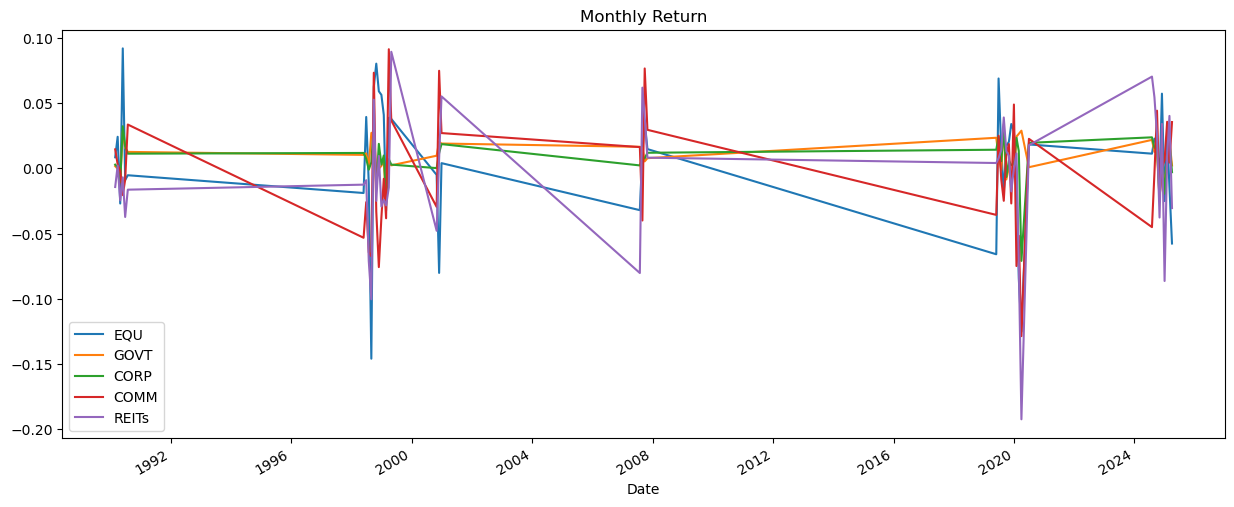

In [32]:
performance_measure(df_Slowdown)

## **Regime-Based Mean-Variance-Optimization Model**

In [33]:
def mvo_optimize(df, risk_aversion, bounds, expected_returns, covariance_matrix, init_guess):
    if not (0 <= risk_aversion <= 10):
        raise ValueError("Risk aversion must be between 0-10")
    
    # Add input validation
    if len(expected_returns) != covariance_matrix.shape[0]:
        raise ValueError("Dimension mismatch")
    
    def objective(weights):
        portfolio_return = np.dot(weights, expected_returns)
        portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
        utility = portfolio_return - (risk_aversion/2) * portfolio_variance
        return -utility  

    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

    result = minimize(
        objective,
        init_guess,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints,
        options={'ftol': 1e-9}  # Tighter tolerance
    )

    if not result.success:
        raise ValueError(f"Optimization failed: {result.message}")

    return result.x

In [34]:
def volatility_based_bounds(df_regime, min_bound=0.05, max_bound=0.75, range_width=0.2):
    # Calculate inverse volatility
    volatility = df_regime.std()
    inv_vol = 1 / volatility
    weights = inv_vol / inv_vol.sum()

    # Generate bounds around those weights
    bounds = []
    for w in weights:
        lower = max(min_bound, w - range_width / 2)
        upper = min(max_bound, w + range_width / 2)
        bounds.append((lower, upper))
    return bounds

In [35]:
bounds = volatility_based_bounds(df.drop(columns=['regimes']))

In [36]:
def inverse_volatility_guess(df):
    inv_vol = 1 / df.std()
    return (inv_vol / inv_vol.sum()).values.tolist()

In [37]:
init_guess = inverse_volatility_guess(df.drop(columns=['regimes']))

In [38]:
def optimal_weights(df_regime, alpha):
    if df_regime.empty:
        print("No data for this regime.")
        return
    expected_returns = df_regime.mean().values
    covariance_matrix = df_regime.cov().values
    names = df_regime.columns.tolist()
    bounds = volatility_based_bounds(df_regime)
    init_guess = inverse_volatility_guess(df_regime)
    optimal_weights = mvo_optimize(df_regime, risk_aversion=alpha, bounds=bounds,
                                   expected_returns=expected_returns,
                                   covariance_matrix=covariance_matrix,
                                   init_guess=init_guess)
    total_weight = sum(optimal_weights)
    normalized_weights = optimal_weights / total_weight

    weights_as_percent = [f"{w * 100:.2f}%" for w in normalized_weights]

    for name, weight in zip(names, weights_as_percent):
        print(f"{name}: {weight}")

In [39]:
regimes_dict = {
    '----Recovery----': df_Recovery,
    '----Expansion----': df_Expansion,
    '----Downturn----': df_Downturn,
    '----Slowdown----': df_Slowdown
                }

### **Risk Aversion Test**

#### **Risk Aversion = 0**

In [40]:
for name, i in regimes_dict.items():
    print(f'{name}')
    optimal_weights(i, 0)
    print('----------------')

----Recovery----
EQU: 24.40%
GOVT: 23.56%
CORP: 26.24%
COMM: 5.00%
REITs: 20.80%
----------------
----Expansion----
EQU: 21.66%
GOVT: 27.57%
CORP: 17.73%
COMM: 22.81%
REITs: 10.23%
----------------
----Downturn----
EQU: 5.00%
GOVT: 44.42%
CORP: 40.58%
COMM: 5.00%
REITs: 5.00%
----------------
----Slowdown----
EQU: 5.00%
GOVT: 48.19%
CORP: 36.81%
COMM: 5.00%
REITs: 5.00%
----------------


#### **Risk Aversion = 5**

In [41]:
for name, i in regimes_dict.items():
    print(f'{name}')
    optimal_weights(i, 5)
    print('----------------')

----Recovery----
EQU: 24.40%
GOVT: 23.56%
CORP: 26.24%
COMM: 5.00%
REITs: 20.80%
----------------
----Expansion----
EQU: 21.66%
GOVT: 27.57%
CORP: 17.73%
COMM: 22.81%
REITs: 10.23%
----------------
----Downturn----
EQU: 5.00%
GOVT: 44.42%
CORP: 40.58%
COMM: 5.00%
REITs: 5.00%
----------------
----Slowdown----
EQU: 5.00%
GOVT: 48.19%
CORP: 36.81%
COMM: 5.00%
REITs: 5.00%
----------------


#### **Risk Aversion = 10**

In [42]:
for name, i in regimes_dict.items():
    print(f'{name}')
    optimal_weights(i, 10)
    print('----------------')

----Recovery----
EQU: 24.40%
GOVT: 23.56%
CORP: 26.76%
COMM: 5.00%
REITs: 20.29%
----------------
----Expansion----
EQU: 21.66%
GOVT: 32.80%
CORP: 17.73%
COMM: 22.81%
REITs: 5.00%
----------------
----Downturn----
EQU: 5.00%
GOVT: 47.52%
CORP: 37.48%
COMM: 5.00%
REITs: 5.00%
----------------
----Slowdown----
EQU: 5.00%
GOVT: 48.19%
CORP: 36.81%
COMM: 5.00%
REITs: 5.00%
----------------


In [46]:
weights_risk_aversion_0 = np.array([
    [0.2440, 0.2356, 0.2624, 0.0500, 0.2080],  # Recovery
    [0.2166, 0.2757, 0.1773, 0.2281, 0.1023],  # Expansion
    [0.0500, 0.4442, 0.4058, 0.0500, 0.0500],  # Downturn
    [0.0500, 0.4819, 0.3681, 0.0500, 0.0500]   # Slowdown
])

In [47]:
weights_risk_aversion_5 = np.array([
    [0.2440, 0.2356, 0.2624, 0.0500, 0.2080],  # Recovery
    [0.2166, 0.2757, 0.1773, 0.2281, 0.1023],  # Expansion
    [0.0500, 0.4442, 0.4058, 0.0500, 0.0500],  # Downturn
    [0.0500, 0.4819, 0.3681, 0.0500, 0.0500]   # Slowdown
])

In [48]:
weights_risk_aversion_10 = np.array([
    [0.2440, 0.2356, 0.2676, 0.0500, 0.2029],  # Recovery
    [0.2166, 0.3280, 0.1773, 0.2281, 0.0500],  # Expansion
    [0.0500, 0.4752, 0.3748, 0.0500, 0.0500],  # Downturn
    [0.0500, 0.4819, 0.3681, 0.0500, 0.0500]   # Slowdown
])

In [54]:
def calculate_portfolio_return(row, weights):
    if row['regimes'] == 'Recovery':
        return np.dot(row[['EQU', 'GOVT', 'CORP', 'COMM', 'REITs']], weights[0])
    elif row['regimes'] == 'Expansion':
        return np.dot(row[['EQU', 'GOVT', 'CORP', 'COMM', 'REITs']], weights[1])
    elif row['regimes'] == 'Downturn':
        return np.dot(row[['EQU', 'GOVT', 'CORP', 'COMM', 'REITs']], weights[2])
    elif row['regimes'] == 'Slowdown':
        return np.dot(row[['EQU', 'GOVT', 'CORP', 'COMM', 'REITs']], weights[3])
    else:
        return np.nan

df_result = pd.DataFrame(
    columns=['risk_aversion_0', 'risk_aversion_5', 'risk_aversion_10'],
    index=df.index
)

df_result['risk_aversion_0'] = df.apply(
    calculate_portfolio_return, axis=1, weights=weights_risk_aversion_0
)
df_result['risk_aversion_5'] = df.apply(
    calculate_portfolio_return, axis=1, weights=weights_risk_aversion_5
)

df_result['risk_aversion_10'] = df.apply(
    calculate_portfolio_return, axis=1, weights=weights_risk_aversion_10
)

In [55]:
df_result

,risk_aversion_0,risk_aversion_5,risk_aversion_10
Date,,,
1990-02-28,0.002361,0.002361,0.002361
1990-03-30,0.001655,0.001655,0.001655
1990-04-30,-0.010931,-0.010931,-0.010931
1990-05-31,0.028699,0.028699,0.028699
1990-06-29,0.011187,0.011187,0.011187
...,...,...,...
2024-11-29,0.013264,0.013264,0.013264
2024-12-31,-0.019796,-0.019796,-0.019796
2025-01-31,0.008114,0.008114,0.008114


<Axes: title={'center': 'Cumulative Portfolio Returns by Risk Aversion'}, xlabel='Date'>

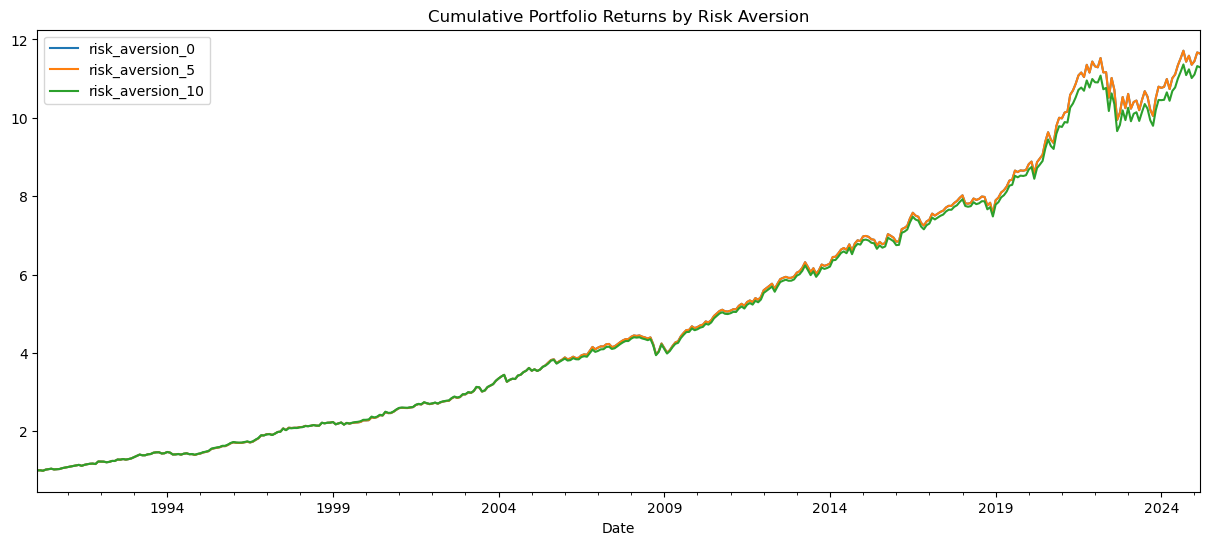

In [56]:
asset_cum_returns = (1 + df_result).cumprod()
asset_cum_returns.plot(figsize=(15, 6), title='Cumulative Portfolio Returns by Risk Aversion')

In [57]:
asset_perf = pd.DataFrame(dtype = float, columns = ['return','vol','Sharpe','Max Drawdown'])
# calculate performance
asset_perf['return'] = asset_cum_returns.iloc[-1] ** (1/(asset_cum_returns.shape[0]/12)) - 1
asset_perf['vol'] = df_result.std() * np.sqrt(12)
asset_perf['Sharpe'] = asset_perf['return']/asset_perf['vol']
asset_perf['Max Drawdown'] = (1 - asset_cum_returns/asset_cum_returns.cummax()).max()
asset_perf

,return,vol,Sharpe,Max Drawdown
risk_aversion_0,0.072283,0.058890,1.227421,0.137196
risk_aversion_5,0.072283,0.058890,1.227421,0.137196
risk_aversion_10,0.071357,0.056878,1.254560,0.127923
